# SAMueL-2 full production analysis

## Import packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from utils.data_process import DataProcess
from utils.descriptive_stats import DescriptiveStatistics
from utils.pathway import Pathway
from utils.reporting import GlobalReport
from utils.thrombolysis_choice_model import ThrombolysisChoiceModel
from utils.thrombolysis_outcome_model import OutcomeModel

## Create data for models

See 'data' folder for processing of raw data.

In [2]:
data_processor = DataProcess(
    year_min=2016,
    year_max=2021,
    limit_to_ambo=True,
)

data_processor.run()

All rows: 283285, ML rows:119897, Fraction: 0.42


## Model Run

In [3]:
run_model = True

if run_model:
    # Descriptive statistics
    ds = DescriptiveStatistics()
    #ds.run()
    
    # Thrombolysis decision model
    thrombolysis_choice_model = ThrombolysisChoiceModel()
    #thrombolysis_choice_model.run()

    # Outcome model
    outcome_model = OutcomeModel()
    outcome_model.run()

    # Pathway simulation
    
    """
    pathway = Pathway(
        data_processor.pathway_simulation_parameters,
        thrombolysis_choice_model.benchmark_thrombolysis,
        trials=100)
    pathway.run()
    """

Outcome multiclass ROC AUC 0.780


In [4]:
outcome_model.all_patients_outcomes_untreated_weighted_mrs.mean()

2.8243998825172665

In [5]:
outcome_model.all_patients_outcomes_treated_weighted_mrs.mean()


2.648411869605055

In [6]:
outcome_model.all_patients_outcomes_improved.mean()

0.5576996875171317

(array([  33.,   27.,   31.,   51.,   60.,   56.,   81.,   78.,  110.,
         121.,  123.,  149.,  169.,  214.,  238.,  271.,  344.,  358.,
         412.,  446.,  518.,  609.,  662.,  825.,  902.,  964., 1062.,
        1121., 1240., 1168., 1043.,  789.,  651.,  529.,  456.,  347.,
         272.,  229.,  237.,  179.,  149.,  122.,   95.,   93.,   71.,
          52.,   42.,   40.,   42.,   31.,   29.,   15.,   15.,   15.,
           9.,    6.,   14.,   13.,    7.,   13.]),
 array([-1.50000000e+00, -1.45000000e+00, -1.40000000e+00, -1.35000000e+00,
        -1.30000000e+00, -1.25000000e+00, -1.20000000e+00, -1.15000000e+00,
        -1.10000000e+00, -1.05000000e+00, -1.00000000e+00, -9.50000000e-01,
        -9.00000000e-01, -8.50000000e-01, -8.00000000e-01, -7.50000000e-01,
        -7.00000000e-01, -6.50000000e-01, -6.00000000e-01, -5.50000000e-01,
        -5.00000000e-01, -4.50000000e-01, -4.00000000e-01, -3.50000000e-01,
        -3.00000000e-01, -2.50000000e-01, -2.00000000e-01, -1.5000

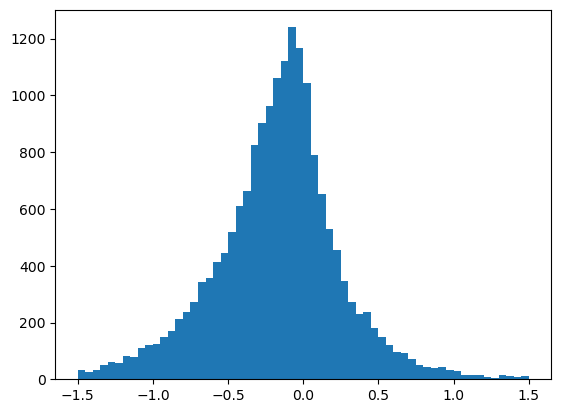

In [7]:
diff = outcome_model.all_patients_outcomes_treated_weighted_mrs - outcome_model.all_patients_outcomes_untreated_weighted_mrs
# Plot histogram of difference in mRS
plt.hist(diff, bins=np.arange(-1.5,1.51,0.05))

In [8]:
outcome_model.all_patients_outcomes_treated[:, 0:5].sum(axis=1)

array([0.08543087, 0.98097366, 0.4314919 , ..., 0.9835231 , 0.9551714 ,
       0.20346844], dtype=float32)

In [9]:
outcome_model.all_patients_outcomes_treated[:, 0:5]

array([[0.00114461, 0.00549417, 0.00402922, 0.01022931, 0.06453355],
       [0.03366897, 0.08689027, 0.13278343, 0.6162677 , 0.11136328],
       [0.03796437, 0.05565274, 0.0898882 , 0.10769137, 0.14029522],
       ...,
       [0.01959736, 0.12009063, 0.38721466, 0.4355573 , 0.0210631 ],
       [0.03779501, 0.42935014, 0.24704014, 0.14365086, 0.09733527],
       [0.01676229, 0.04474084, 0.01191461, 0.09064182, 0.0394089 ]],
      dtype=float32)

## Reporting

In [10]:
report = GlobalReport()
report.create_report()